<a href="https://colab.research.google.com/github/Shahabshms/Numerical_Methods_for_ML_and_AI_Solution_1/blob/main/_4301_HW1_Q2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**2) Line Search vs. Fixed Step Size**

1) Consider the least squares optimization problem discussed in class. That  is, given a collection of data observations $(x
^{(1)}, y^{(M)}), . . . ,(x^{(M)},y^{(M)})\in\mathbb{R}^2$
, consider finding the line $f(x) = ax+b$
that minimizes the squared error.
\begin{align}
f(x) = \frac{1}{M}\sum_{i=1}^{n} (y_i - ax_i - b)^2
\end{align}


In [ ]:
def function_square(point): #The Least Square function
  return  sum([(data[i][1] - point[0] * data[i][0] - point[1])**2 for i in range(len(data))]) / len(data)

\begin{align}
\frac{\partial f(x)}{\partial a} &= \frac{1}{M}\sum_{i=1}^{n} 2(y_i - ax_i - b)(-x_i)\\
\frac{\partial f(x)}{\partial b} &= \frac{1}{M}\sum_{i=1}^{n} 2(y_i - ax_i - b)(-1)
\end{align}

In [ ]:
def gradient_square(point): #The gradient of the Least Square function
  gradient = [0 for i in range(len(point))]
  gradient[0] = sum([2 * (data[i][1] - point[0] * data[i][0] - point[1]) * (-data[i][0])\
                     for i in range(len(data))]) / len(data)
  gradient[1] = sum([2 * (data[i][1] - point[0] * data[i][0] - point[1]) * (-1) \
                     for i in range(len(data))]) / len(data)

  # Make sure you know what \ does.
  # And make sure you know that \ is not /.  
  return gradient

In Python, implement gradient descent to find the optima a and b in the following ways:


1. Standard gradient descent with a fixed step size, $\gamma$.
2. Standard gradient descent with a diminishing step size $\frac{p}{q+t}$ for a given $p$ and $q$.
3. Gradient descent with exact line search.
4. Gradient descent with backtracking line search for a given $\alpha$ and $\beta$.
5. (From part 2) Standard gradient decent with diminishing step size $\frac{p}{\sqrt{t}}$ 



In **Exact Line Search**, first and for the ease of notation define
\begin{align}
g_a &= \frac{\partial f(x)}{\partial a} \text{   and    }
g_b = \frac{\partial f(x)}{\partial b}.
\end{align}
Now the goal is to fine $\gamma$ such that it minimizes $f(x - \gamma\nabla f(x))$. In particular, with
\begin{align}
f(x - \gamma\nabla f(x)) &= \frac{1}{M}\sum_{i=1}^{n} \left(y_i - (a - \gamma g_a)x_i - (b-\gamma g_b)\right)^2,
\end{align}
$\gamma$ comes from the following optimization problem:
\begin{align}
\gamma^* = \text{argmin}_{\gamma} f(x - \gamma\nabla f(x))
\end{align}
This optimization problem has a closed form solution, and we only need to take the derivate of $f(x - \gamma\nabla f(x))$ with respect to $\gamma$ and put it equal to zero. So
\begin{align}
\frac{\partial f(x - \gamma\nabla f(x))}{\partial \gamma} & = \frac{1}{M}\sum_{i=1}^{n} 2(y_i - ax_i - b + \gamma(g_ax_i + g_b))(g_ax_i + g_b) = 0.
\end{align}
Finally
\begin{align}
\gamma = \frac{-\sum_{i=1}^{n} (y_i - ax_i - b)(g_ax_i + g_b) }{\sum_{i=1}^{n} (g_ax_i + g_b)^2}.
\end{align}


In [ ]:
# In this function, you can find all the five different step size methods.
# Instead of adding multiple functions, there is only one gradient decent
# function (part 1 and 2 both have their own) that make use of step sizes from 
# this function. Variable "method" determines which step size method to use.

# This function is shared between part 1 and 2. But since part 2 does not run
# exact and backtracking line search, in those particular methods we have 
# made use of the omptimized gamma that you see in the above text cell and 
# function_square() respectively. So if you want to see how part 2 works with 
# these two methods make sure that you have another cell that has your proper 
# exact and backtracking line search for part 2. 

def step_size(method,iteration,gradient,point):
  if method == "fixed step":
    gamma = 0.05 # I think 0.5 is a typo. 
    return gamma

  if method == "diminishing step size 1":
    p = 1
    q = 1
    return p/(q+iteration)

  if method == "diminishing step size 2":
    p = 1
    return  p/(iteration)**(0.5) 

  if method == "exact line search": 
    # This gamma is exactly what we saw in the previous text cell. 
    gamma = -sum([\
                 (data[i][1] - point[0]*data[i][0] - point[1])\
                 *(gradient[0]*data[i][0] + gradient[1])\
                 for i in range(len(data))\
                 ])\
            /sum([\
                  (gradient[0]*data[i][0]+gradient[1])**2\
                  for i in range(len(data))\
                  ])
    return gamma

  if method == "backtracking line search":
    alpha = 0.3
    beta = 0.1
    gamma = 1
    while function_square([point[i] - gamma * gradient[i] for i in range(len(gradient))]) > \
    function_square(point) - alpha * gamma * sum([g**2 for g in gradient]) :
      gamma *= beta

      
    return gamma

In [ ]:
# This function runs the iterations and updates the weights a and b for part 1.
def run_gradient_decent_square(iterations,initial_point,method):
  point = initial_point
  plot_data = []

  for iteration in range(1,iterations):

    gradient = gradient_square(point) # taking the gradient
    gamma = step_size(method,iteration,gradient,point) # step size
    point = [point[i] - gradient[i]*gamma for i in range(len(gradient))] # update

    plot_data.append(function_square(point)) # This line only saves the values, to plot later.

  return [point,plot_data]

In [ ]:
# Read the data and initializations and import
with open('linreg.data', 'r') as f:
    data = f.read()
data = data[1:]
data = data.split()
data = [[float(d) for d in dat.split(',')] for dat in data]

initial_point = [0,0]
iterations = 100

import matplotlib.pyplot as plt

[3.1207177490943323, -3.887586208112561]


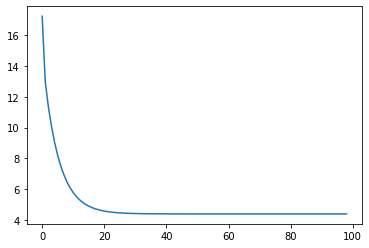

In [ ]:
[best_point,plot_data] = run_gradient_decent_square(iterations,initial_point,"fixed step")
print(best_point)
plt.plot(plot_data)

[3.1207087602475223, -3.887708570069239]


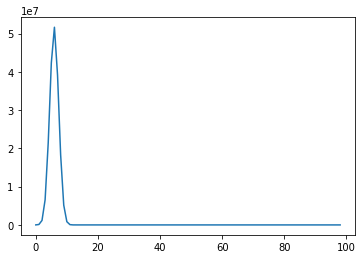

In [ ]:
[best_point,plot_data] = run_gradient_decent_square(iterations,initial_point,"diminishing step size 1")
print(best_point)
plt.plot(plot_data)

[3.1207055065900553, -3.887752860944642]


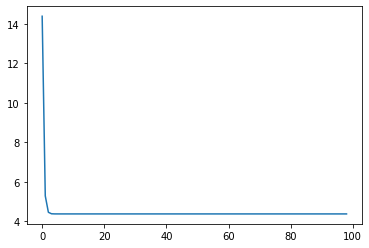

In [ ]:
[best_point,plot_data] = run_gradient_decent_square(iterations,initial_point,"exact line search")
print(best_point)
plt.plot(plot_data)

[3.120705513700349, -3.8877527641551315]


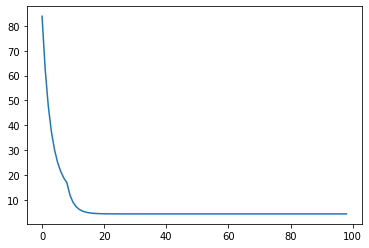

In [ ]:
[best_point,plot_data] = run_gradient_decent_square(iterations,initial_point,"backtracking line search")
print(best_point)
plt.plot(plot_data)

2) Consider the same function fitting problem as above but with absolute error.\begin{align}
f(x) = \frac{1}{M}\sum_{i=1}^{n} |y_i - ax_i - b|
\end{align}

In [ ]:
def function_absolute(point): # Absolute function
  return  sum([abs(data[i][1] - point[0] * data[i][0] - point[1]) for i in range(len(data))]) / len(data)

\begin{align}
\frac{\partial f(x)}{\partial a} &= \frac{1}{M}\sum_{i=1}^{n} \begin{cases}
x_i & \text{if } y_i - ax_i - b < 0\\
-x_i & \text{if } y_i - ax_i - b > 0 \\
g\in[\min(-x_i,x_i),\max(-x_i,x_i)] & \text{if }y_i - ax_i - b = 0
\end{cases}\\
\\
\frac{\partial f(x)}{\partial b} &= \frac{1}{M}\sum_{i=1}^{n} \begin{cases}
1 & \text{if } y_i - ax_i - b < 0\\
-1 & \text{if } y_i - ax_i - b > 0 \\
g\in[-1,1] & \text{if }y_i - ax_i - b = 0
\end{cases}
\end{align}

In [ ]:
def gradient_absolute(point): # Gradient of the Absolute function
  gradient = [0 for i in range(len(point))]

  for i in range(len(data)):
    if data[i][1] - point[0] * data[i][0] - point[1] < 0:
      gradient[0] += data[i][0]
      gradient[1] += 1
    elif data[i][1] - point[0] * data[i][0] - point[1] > 0:
      gradient[0] -= data[i][0]
      gradient[1] -= 1
    else:
      gradient[0] += 0 # Could be anything betweein min(-x[i],x[i]) and max(-x[i],x[i])
      gradient[1] += 0 # Could be anything between -1 and 1

      # If your answer is differet from this, maybe the reason is these 0s. 

  gradient[0] /= len(data) # M = len(data)
  gradient[1] /= len(data)

  return gradient

In [ ]:
# This function runs the iterations and updates the weights a and b for part 2.
def run_gradient_decent_absolute(iterations,initial_point,method):
  point = initial_point
  plot_data = []

  for iteration in range(1,iterations):

    gradient = gradient_absolute(point) # gradien
    gamma = step_size(method,iteration,gradient,point) # step size
    point = [point[i] - gradient[i]*gamma for i in range(len(gradient))] #update

    plot_data.append(function_square(point))

  return [point,plot_data]

[3.140852715131747, -2.664028937483266]


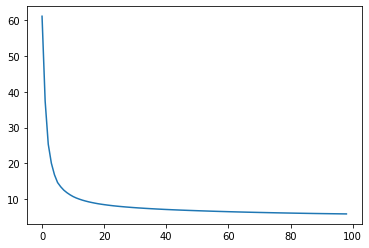

In [ ]:
[best_point,plot_data] = run_gradient_decent_absolute(iterations,initial_point,"diminishing step size 1")
print(best_point)
plt.plot(plot_data)

[3.0970467091862592, -3.746983857372168]


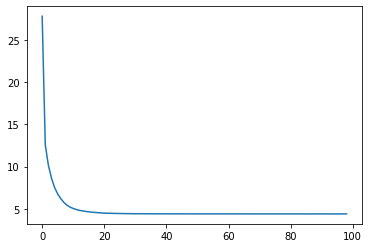

In [ ]:
[best_point,plot_data] = run_gradient_decent_absolute(iterations,initial_point,"diminishing step size 2")
print(best_point)
plt.plot(plot_data)